In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [10]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [11]:
from keras.utils.np_utils import to_categorical

In [12]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
from keras import models
from keras import layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 361us/step - loss: 2.6592 - accuracy: 0.5482 - val_loss: 1.7296 - val_accuracy: 0.6340
Epoch 2/20
7982/7982 [==============================] - 2s 229us/step - loss: 1.4304 - accuracy: 0.7011 - val_loss: 1.3144 - val_accuracy: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.0692 - accuracy: 0.7662 - val_loss: 1.1484 - val_accuracy: 0.7480
Epoch 4/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.8525 - accuracy: 0.8171 - val_loss: 1.0499 - val_accuracy: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.6813 - accuracy: 0.8571 - val_loss: 1.0069 - val_accuracy: 0.7770
Epoch 6/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.5470 - accuracy: 0.8891 - val_loss: 0.9274 - val_accuracy: 0.8080
Epoch 7/20
7982/7982 [==============================] - 2s 200us/step - loss

In [18]:
import matplotlib.pyplot as plt

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [20]:
epochs = range(1, len(loss) + 1)

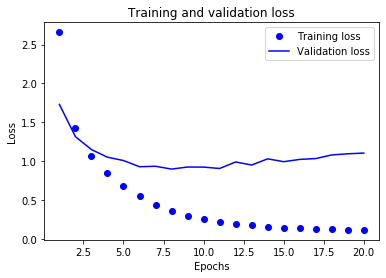

In [21]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [23]:
history.history

{'val_loss': [1.7296314630508423,
  1.3143783559799194,
  1.148381199836731,
  1.0499349269866944,
  1.0069418153762817,
  0.9273839859962464,
  0.9333410902023316,
  0.8969438114166259,
  0.9235312509536743,
  0.9224817461967468,
  0.9047740097045899,
  0.9885726871490479,
  0.9492101078033447,
  1.0291245527267456,
  0.9921629066467286,
  1.0215538501739503,
  1.0325087127685546,
  1.0791216764450073,
  1.094110577583313,
  1.1029663257598876],
 'val_accuracy': [0.6340000033378601,
  0.7059999704360962,
  0.7480000257492065,
  0.7739999890327454,
  0.7770000100135803,
  0.8080000281333923,
  0.7960000038146973,
  0.8119999766349792,
  0.8100000023841858,
  0.8130000233650208,
  0.828000009059906,
  0.7910000085830688,
  0.8169999718666077,
  0.8080000281333923,
  0.8100000023841858,
  0.8130000233650208,
  0.8149999976158142,
  0.8019999861717224,
  0.8009999990463257,
  0.7950000166893005],
 'loss': [2.659204874382793,
  1.4303665843054156,
  1.0691854472866456,
  0.8524621386660636

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

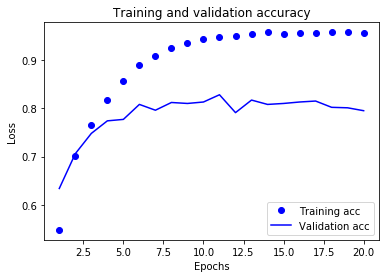

In [25]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.fit(partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 246us/step - loss: 2.7233 - accuracy: 0.5049 - val_loss: 1.8232 - val_accuracy: 0.6360
Epoch 2/9
7982/7982 [==============================] - 1s 162us/step - loss: 1.4858 - accuracy: 0.7080 - val_loss: 1.3503 - val_accuracy: 0.7080
Epoch 3/9
7982/7982 [==============================] - 2s 208us/step - loss: 1.0945 - accuracy: 0.7749 - val_loss: 1.1746 - val_accuracy: 0.7510
Epoch 4/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.8756 - accuracy: 0.8242 - val_loss: 1.0795 - val_accuracy: 0.7680
Epoch 5/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.7073 - accuracy: 0.8577 - val_loss: 1.0157 - val_accuracy: 0.7970
Epoch 6/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.5749 - accuracy: 0.8810 - val_loss: 0.9778 - val_accuracy: 0.8040
Epoch 7/9
7982/7982 [==============================] - 1s 166us/step - loss: 0.461

In [27]:
results

[0.9824172178762679, 0.7831701040267944]

In [28]:
 import copy

In [30]:
 test_labels_copy = copy.copy(test_labels)
 np.random.shuffle(test_labels_copy)
 hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [31]:
 float(np.sum(hits_array)) / len(test_labels)

0.19590382902938558

In [32]:
#Generating predictions on new data
predictions = model.predict(x_test)

In [33]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [34]:
model.compile(optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['acc'])

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
    
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 308us/step - loss: 2.7979 - accuracy: 0.3810 - val_loss: 2.0128 - val_accuracy: 0.5470
Epoch 2/20
7982/7982 [==============================] - 2s 209us/step - loss: 1.6770 - accuracy: 0.6012 - val_loss: 1.5230 - val_accuracy: 0.6260
Epoch 3/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.3283 - accuracy: 0.6649 - val_loss: 1.3883 - val_accuracy: 0.6580
Epoch 4/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.1574 - accuracy: 0.6934 - val_loss: 1.3269 - val_accuracy: 0.6710
Epoch 5/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.0278 - accuracy: 0.7278 - val_loss: 1.3009 - val_accuracy: 0.6780
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.9264 - accuracy: 0.7548 - val_loss: 1.2731 - val_accuracy: 0.6930
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss